## Benchmarking task - Summarization

#### Install python packages requested by benchmarking

If you have not install the requested python libraries, uncomment the following command to run the installation.

In [ ]:
#!pip install -r ../peccyben/requirements.txt

#### Import libraries

In [1]:
import pandas as pd
import sys

sys.path.insert(0, '../')

from peccyben.summarizationtask import Summ_Ben
from peccyben.utils import Ben_Save
from peccyben.promptcatalog import Prompt_Template_Gen

2025-04-01 23:30:14.079328: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 23:30:14.092683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 23:30:14.111084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 23:30:14.116748: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 23:30:14.130088: I tensorflow/core/platform/cpu_feature_guar

#### Configuration

Setup your environment parameters 

* **BENCH_KEY**: a unique keyname for your benchmarking in this round 
* **S3_BUCKET**: the S3 buckt you created for the benchmarking    
* **TASK_FOLDER**: the task folder you created under the S3 bucket   
* **INPUT_FILE**: the file name of the dataset you prepared for benchmarking    
* **METRICS_LIST**: the metrics we provide for the text summarization task      
* **BEDROCK_REGION**: the AWS region that the model benchmarking runs on Bedrock
* **COST_FILE**: the price file used for calculating model inference cost 

In [2]:
BENCH_KEY = 'PeccyBen_202503_xsum'
S3_BUCKET = 'genai-sdo-llm-ben-20240310'
TASK_FOLDER = 'ben-summ'
INPUT_FILE = 'xsum_100.csv'
METRICS_LIST = ['Inference_Time','Input_Token','Output_Token','Throughput','RougeL-sum','Semantic_Similarity','BERT-F1','LJ_Score','Toxicity','Cost','Cache_Input_Token','Cache_Output_Token']
BEDROCK_REGION = 'us-east-1'
COST_FILE = 'bedrock_od_public.csv'

Results_summ = pd.DataFrame()
Results_summ = Results_summ.assign(metric_name=METRICS_LIST) 
Results_summ = Results_summ.set_index('metric_name')

#### Task specific setting

* Configure your **prompt** in the prompt catalog (prompt_catalog.json), and configure the prompt_catalog_id
* Set the **LLM hyperparameter** in model_kwargs. For the models on Bedrock, refer to [inferenceConfig](https://docs.aws.amazon.com/bedrock/latest/userguide/conversation-inference-call.html)
* Set two **LLM-judge models** (judge_model_1, judge_model_2) for the LLM-judge for the summarization task

In [3]:
prompt_catalog_id = "summ-1"

model_kwargs = {
    'maxTokens': 512, 
    'topP': 0.9, 
    'temperature': 0
}   

judge_model_1 = "us.anthropic.claude-3-7-sonnet-20250219-v1:0"
judge_model_2 = "us.deepseek.r1-v1:0"

#### Specify the model and other settings for benchmarking

Invoke **Summ_Ben** function to conduct the benchmarking for one selected model, repeat for multiple models you want to benchmark

* **method**: set "Bedrock" for the models on Bedrock
* **region**: configured in the previous step
* **model_id**: specify the Model ID for the model endpoint
* **jm1**: configured in previous step
* **jm2**: configured in previous step
* **model_kwargs**: configured in previous step
* **prompt_template**: prompt template based on the prompt configured in previous step
* **s3_bucket**: configured in previous step
* **file_name**: configured in previous step
* **BENCH_KEY**: configured in previous step
* **task_folder**: configured in previous step
* **cost_key**: set "public" when using AWS public pricing to calculate the cost
* **save_id**: the model name displayed in the report 
* **SLEEP_SEC**: you can configure "sleep and retry" when throtting, for example, set SLEEP_SEC = 10 to wait for 10 seconds between each inference
* **SAMPLE_LEN**: you can configure the number of samples for inference
* **PP_TIME**: if you want to run model inference for multiple rounds, set the number of rounds here.  
* **cacheconf**: set "default" to enable Bedrock Prompt Caching in the inference, "None" to disable
* **latencyOpt**: set "optimized" to enable Bedrock Latency Optimized Inference, "None" to disable

In [4]:
# Haiku 3.5
model_id = 'us.anthropic.claude-3-5-haiku-20241022-v1:0' 
save_id = 'haiku-3.5'

prompt_template = Prompt_Template_Gen(model_id, prompt_catalog_id)

Results_summ[save_id] = Summ_Ben(method="Bedrock",
                                 region=BEDROCK_REGION,
                                 model_id=model_id,
                                 jm1=judge_model_1,
                                 jm2=judge_model_2,
                                 model_kwargs=model_kwargs,
                                 prompt_template=prompt_template,
                                 s3_bucket=S3_BUCKET,
                                 file_name=INPUT_FILE,
                                 BENCH_KEY=BENCH_KEY,
                                 task_folder=TASK_FOLDER,
                                 cost_key=COST_FILE,
                                 save_id=save_id,
                                 SLEEP_SEC=20,SAMPLE_LEN=2,
                                 PP_TIME=2,
                                 cacheconf="None",latencyOpt="None")

Results_summ

0 - 0|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 4.5
0 - 1|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
1 - 0|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 4.5
1 - 1|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
Evaluation completed, saving the results... 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,haiku-3.5
metric_name,
Inference_Time,9.596000
Input_Token,2156.000000
Output_Token,480.000000
Throughput,193.783196
RougeL-sum,0.403973
Semantic_Similarity,0.857591
BERT-F1,0.914041
LJ_Score,4.750000
Toxicity,0.000737


In [6]:
# nova-micro
model_id = 'us.amazon.nova-micro-v1:0' 
save_id = 'nova-micro'

prompt_template = Prompt_Template_Gen(model_id, prompt_catalog_id)
#print(prompt_template)

Results_summ[save_id] = Summ_Ben(method="Bedrock",
                                 region=BEDROCK_REGION,
                                 model_id=model_id,
                                 jm1=judge_model_1,
                                 jm2=judge_model_2,
                                 model_kwargs=model_kwargs,
                                 prompt_template=prompt_template,
                                 s3_bucket=S3_BUCKET,
                                 file_name=INPUT_FILE,
                                 BENCH_KEY=BENCH_KEY,
                                 task_folder=TASK_FOLDER,
                                 cost_key=COST_FILE,
                                 save_id=save_id,
                                 SLEEP_SEC=20,SAMPLE_LEN=2,
                                 PP_TIME=2,
                                 cacheconf="default",latencyOpt="None")

Results_summ

0 - 0|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
0 - 1|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 4.5
1 - 0|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
1 - 1|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 4.5
Evaluation completed, saving the results... 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,haiku-3.5,nova-micro
metric_name,,
Inference_Time,9.596000,2.661000
Input_Token,2156.000000,74.000000
Output_Token,480.000000,552.000000
Throughput,193.783196,773.671419
RougeL-sum,0.403973,0.526932
Semantic_Similarity,0.857591,0.921938
BERT-F1,0.914041,0.926326
LJ_Score,4.750000,4.750000
Toxicity,0.000737,0.000757


In [7]:
# nova-micro
model_id = 'us.amazon.nova-micro-v1:0' 
save_id = 'nova-micro-cache'

prompt_template = Prompt_Template_Gen(model_id, prompt_catalog_id)
#print(prompt_template)

Results_summ[save_id] = Summ_Ben(method="Bedrock",
                                 region=BEDROCK_REGION,
                                 model_id=model_id,
                                 jm1=judge_model_1,
                                 jm2=judge_model_2,
                                 model_kwargs=model_kwargs,
                                 prompt_template=prompt_template,
                                 s3_bucket=S3_BUCKET,
                                 file_name=INPUT_FILE,
                                 BENCH_KEY=BENCH_KEY,
                                 task_folder=TASK_FOLDER,
                                 cost_key=COST_FILE,
                                 save_id=save_id,
                                 SLEEP_SEC=20,SAMPLE_LEN=2,
                                 PP_TIME=2,
                                 cacheconf="None",latencyOpt="None")

Results_summ

0 - 0|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
0 - 1|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 4.5
1 - 0|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
1 - 1|

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LLM_Judge_score= 5.0
Evaluation completed, saving the results... 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,haiku-3.5,nova-micro,nova-micro-cache
metric_name,,,
Inference_Time,9.596000,2.661000,2.720000
Input_Token,2156.000000,74.000000,2078.000000
Output_Token,480.000000,552.000000,552.000000
Throughput,193.783196,773.671419,748.591138
RougeL-sum,0.403973,0.526932,0.526932
Semantic_Similarity,0.857591,0.921938,0.921938
BERT-F1,0.914041,0.926326,0.926326
LJ_Score,4.750000,4.750000,4.875000
Toxicity,0.000737,0.000757,0.000757


#### Generate benchmarking report

Invoke **Ben_Save** function to generate your benchmarking report and cost-performance analysis, all the results are stored in S3 bucket

* **Results_summ**: the benchmarking results generated in previous step
* **S3_BUCKET**: configured in previous step
* **BENCH_KEY**: configured in previous step
* **TASK_FOLDER**: configured in previous step
* **perf_metric**: select the performance metric from the metrics list in the previous step, for cost-performance analysis, for example, to analyze the accuracy by LLM-judge score with cost, set "LJ_Score".  
* **top_x**: set the top x number of models you want to run the cost-performance analysis 
* **TITLE**: specify a title for the reports and charts


/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


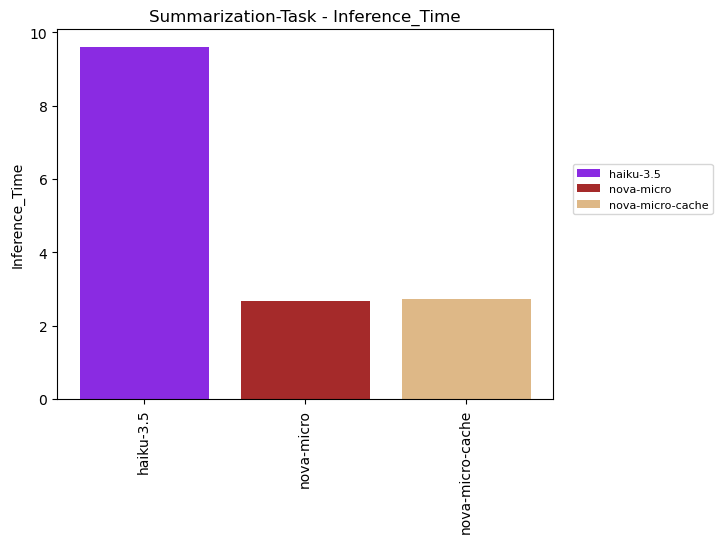

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


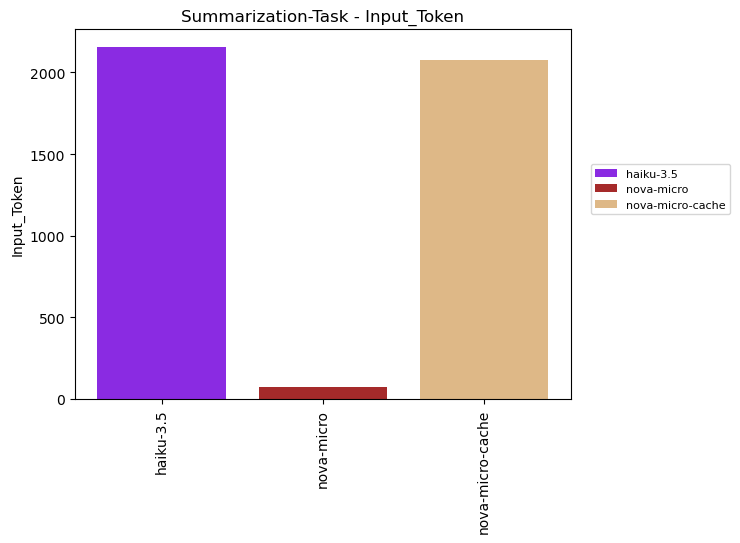

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


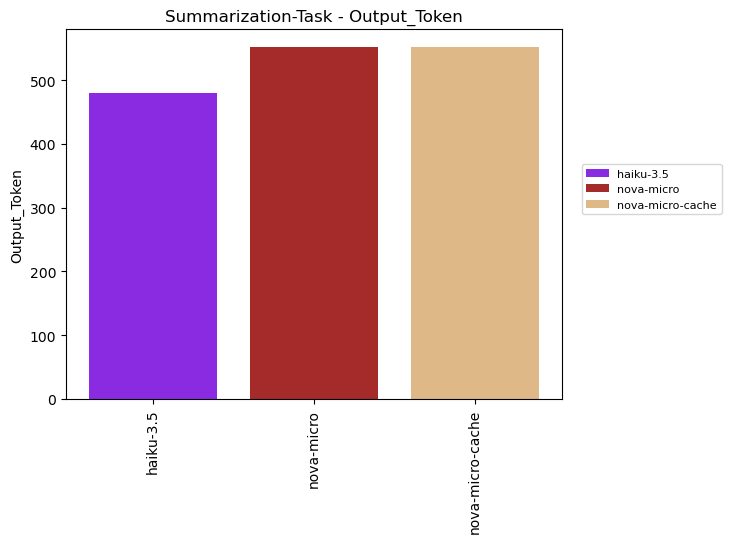

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


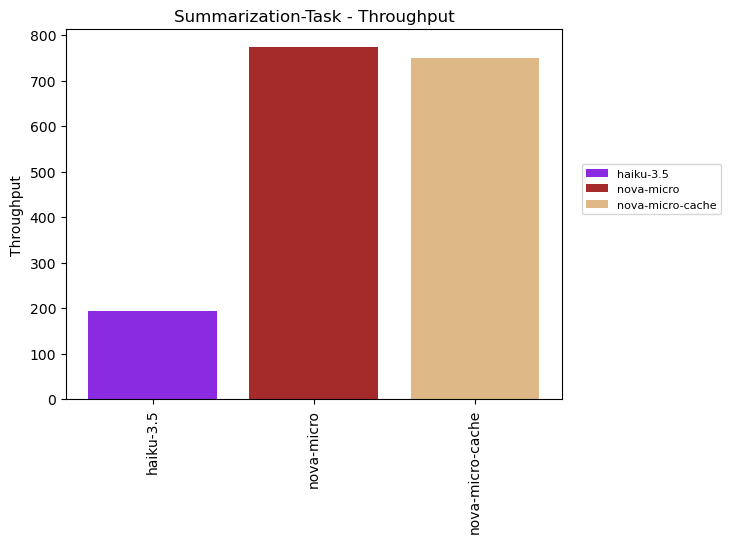

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


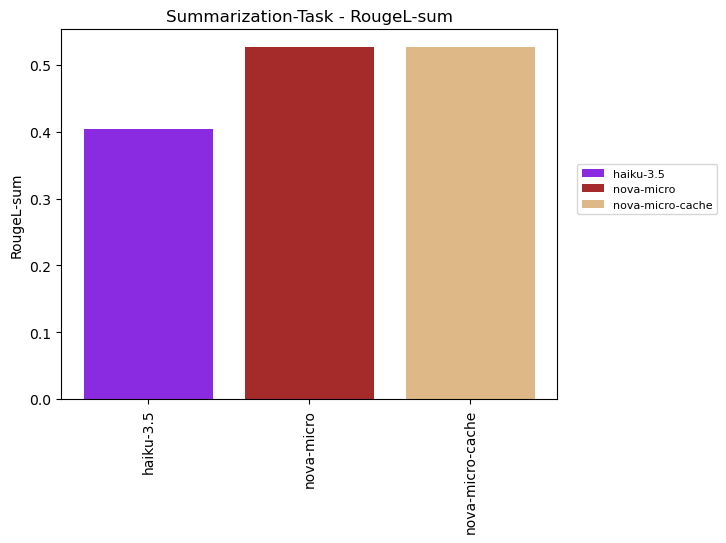

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


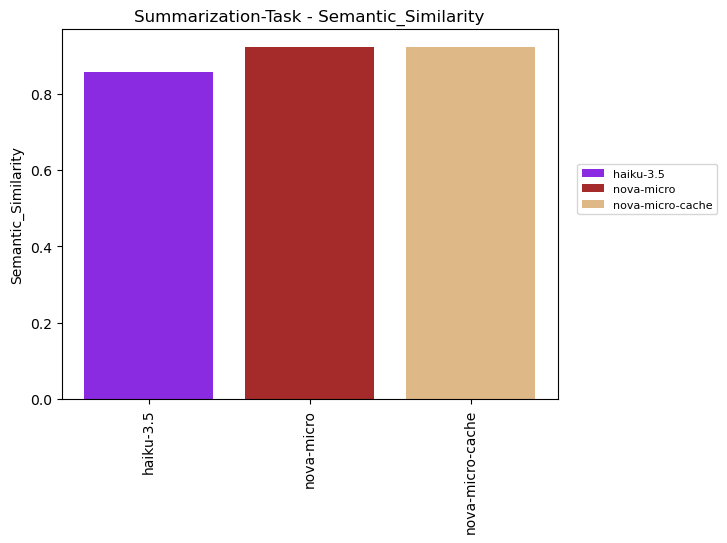

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


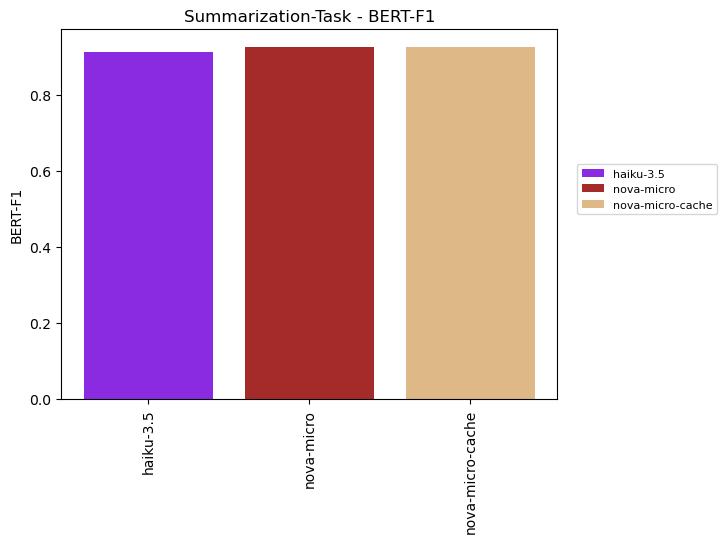

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


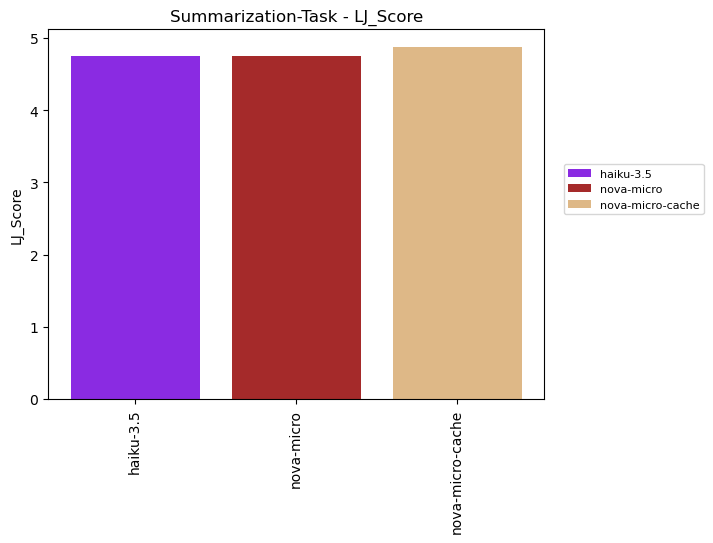

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


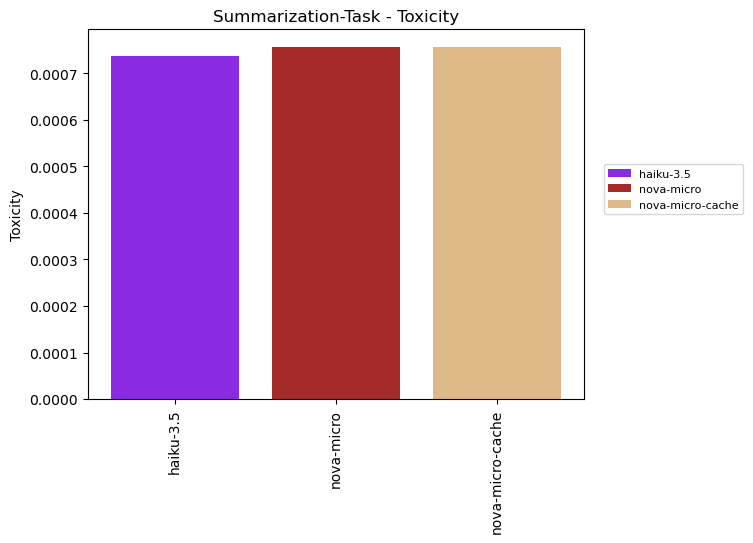

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


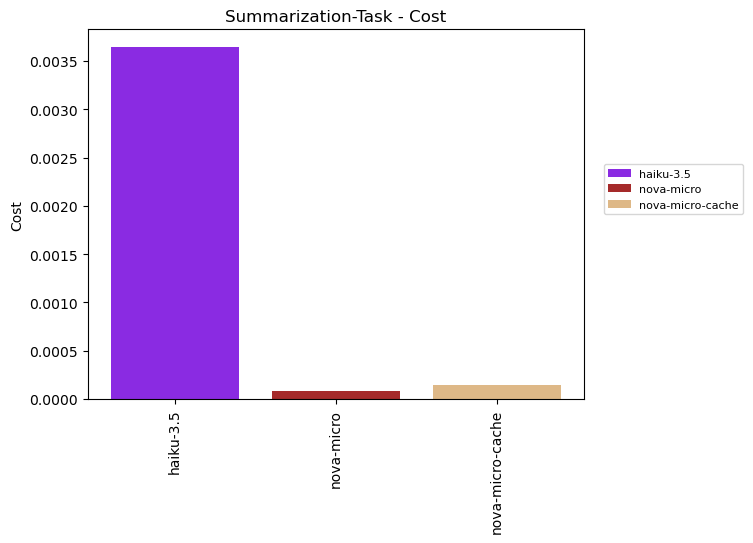

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


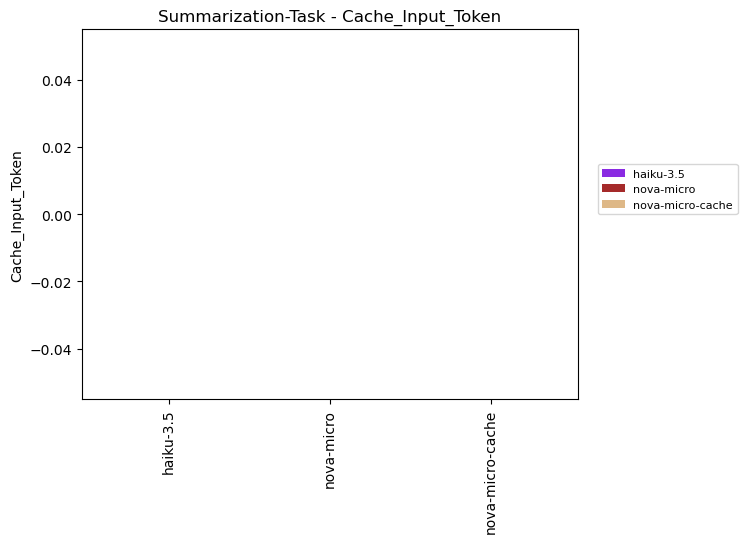

/home/sagemaker-user/peccyben_test_public/../peccyben/utils.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(llm_list,rotation = 90)


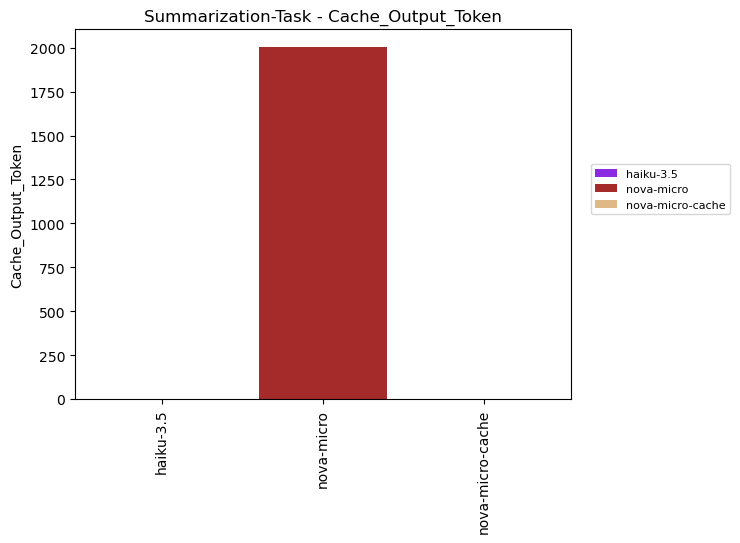

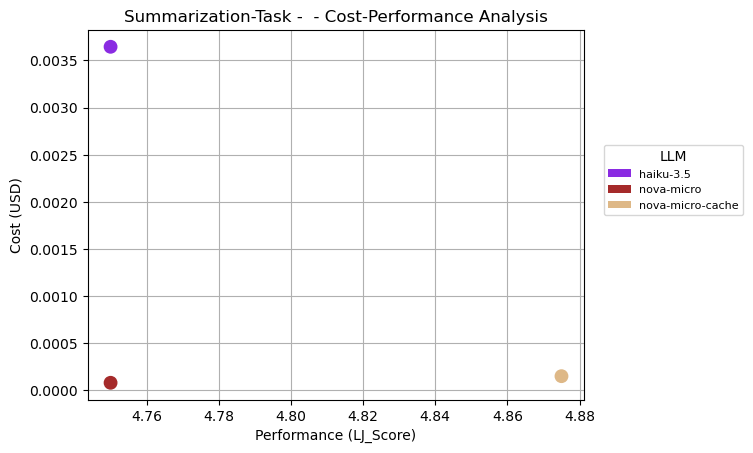

=== df_cp ===
 metric_name       Inference_Time  Input_Token  Output_Token  Throughput  \
haiku-3.5                  9.596       2156.0         480.0  193.783196   
nova-micro                 2.661         74.0         552.0  773.671419   
nova-micro-cache           2.720       2078.0         552.0  748.591138   

metric_name       RougeL-sum  Semantic_Similarity   BERT-F1  LJ_Score  \
haiku-3.5           0.403973             0.857591  0.914041     4.750   
nova-micro          0.526932             0.921938  0.926326     4.750   
nova-micro-cache    0.526932             0.921938  0.926326     4.875   

metric_name       Toxicity      Cost  Cache_Input_Token  Cache_Output_Token  \
haiku-3.5         0.000737  0.003645                0.0                 0.0   
nova-micro        0.000757  0.000080                0.0              2004.0   
nova-micro-cache  0.000757  0.000150                0.0                 0.0   

metric_name          cost_perf  
haiku-3.5          1303.226514  
nova-mic

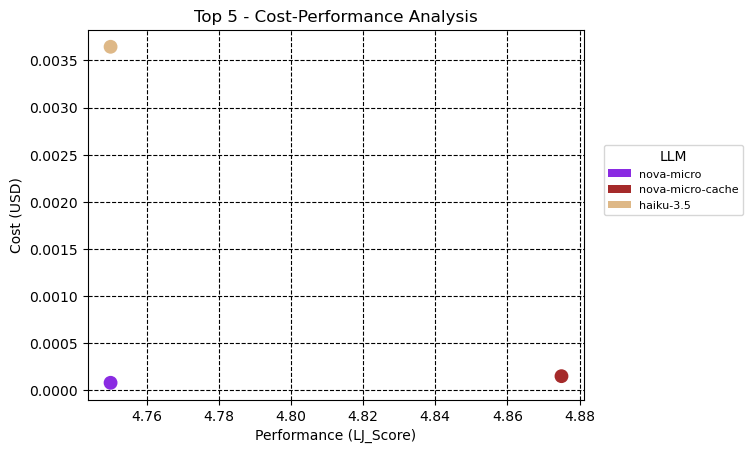

nova-micro          59471.641417
nova-micro-cache    32497.833478
haiku-3.5            1303.226514
Name: cost_perf, dtype: float64

Uploading benchmark metrics ...
Uploading benchmark graphs ... :0|1|2|3|4|5|6|7|8|9|10|11|12|
Uploading cost-performance graphs ... :
Benchmark output upload completed.


In [8]:
perf_metric = 'LJ_Score'
top_x = 5

Ben_Save(Results_summ,S3_BUCKET,BENCH_KEY,TASK_FOLDER,perf_metric,top_x,TITLE="Summarization-Task")